In [2]:
label=['random', 'shortest']
x = ['x = [1,2, ..., 10]', 'x = [1, 1.25, 1.5]']
chord = [25, 18, 10.25, 10]
nn = [13, 23, 43.75, 43.5]
K_ring = [22, 13, 8,  6.25, 6.0, 13.0]

# Data
labels = ['w in [1,2, ..., 10]', 'w in [1, 1.25, 1.5]', 'w in N(5, 1)']
# chord_random = [25, 10.25]
# chord_shortest = [18, 10]

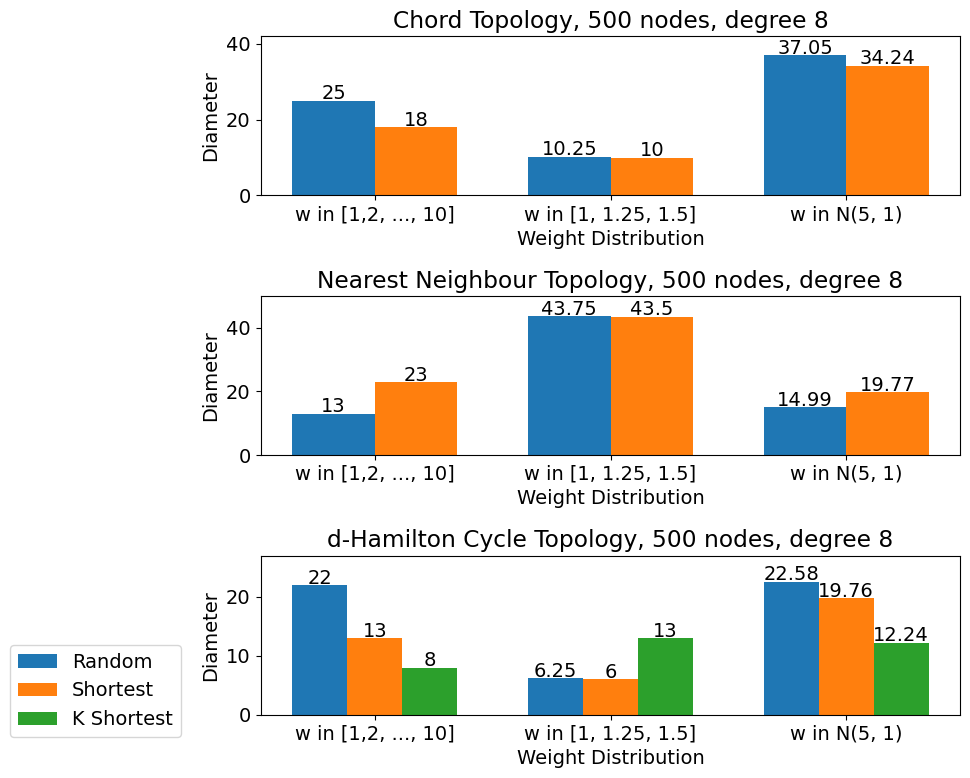

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
font = {
        'size'   : 14}
matplotlib.rc('font', **font)
chord_random = [25, 10.25,  37.05]
chord_shortest = [18, 10, 34.24]
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(nrows=3, figsize=(10, 8))
rects1 = ax[0].bar(x - width/2, chord_random, width, label='Random')
rects2 = ax[0].bar(x + width/2, chord_shortest, width, label='Shortest')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax[0].set_ylabel('Diameter')
ax[0].set_ylim([0, 42])
ax[1].set_ylim([0, 50])
ax[2].set_ylim([0, 27])
ax[0].set_xlabel('Weight Distribution')
ax[0].set_title('Chord Topology, 500 nodes, degree 8')
ax[0].set_xticks(x)
ax[0].set_xticklabels(labels)
# ax[0].legend(loc='upper right', bbox_to_anchor=(-0.05, 0.5))

ax[0].bar_label(rects1, padding=-2)
ax[0].bar_label(rects2, padding=-2)

# fig.tight_layout()

# plt.savefig('chord.pdf')
# import matplotlib.pyplot as plt
# import numpy as np

chord_random = [13, 43.75, 14.99]
chord_shortest = [23, 43.5, 19.77]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

# fig, ax = plt.subplots(figsize=(10, 3))
rects1 = ax[1].bar(x - width/2, chord_random, width, label='Random')
rects2 = ax[1].bar(x + width/2, chord_shortest, width, label='Shortest')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax[1].set_ylabel('Diameter')
ax[1].set_xlabel('Weight Distribution')
ax[1].set_title('Nearest Neighbour Topology, 500 nodes, degree 8')
ax[1].set_xticks(x)
ax[1].set_xticklabels(labels)
# ax[1].legend(loc='upper right', bbox_to_anchor=(-0.05, 0.5))

ax[1].bar_label(rects1, padding=-2)
ax[1].bar_label(rects2, padding=-2)

# fig.tight_layout()

# plt.savefig('nearest_neighbour.pdf')
K_ring = [22, 13, 8,  6.25, 6.0, 13.0]

# import matplotlib.pyplot as plt
# import numpy as np

chord_random = [22, 6.25, 22.58]
chord_shortest = [13, 6.0, 19.76]
chord_k_shortest = [8, 13, 12.24]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

# fig, ax = plt.subplots(figsize=(10, 3))
rects1 = ax[2].bar(x - width/3 * 2, chord_random, width / 3 * 2, label='Random')
rects2 = ax[2].bar(x, chord_shortest, width/ 3 * 2, label='Shortest')
rects3 = ax[2].bar(x + width/3 * 2, chord_k_shortest, width/ 3 * 2, label='K Shortest')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax[2].set_ylabel('Diameter')
ax[2].set_xlabel('Weight Distribution')
ax[2].set_title('d-Hamilton Cycle Topology, 500 nodes, degree 8')
ax[2].set_xticks(x)
ax[2].set_xticklabels(labels)
ax[2].legend(loc='upper right', bbox_to_anchor=(-0.1, 0.5))

ax[2].bar_label(rects1, padding=-2)
ax[2].bar_label(rects2, padding=-2)
ax[2].bar_label(rects3, padding=-2)

fig.tight_layout()

# plt.savefig('k_ring.pdf')
plt.savefig('combine.pdf')

In [1]:
import torch as th
import pickle as pkl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
data_perigee = []

with open(f"N=5000_cluster_guassian.pkl", "rb") as f:
    data = pkl.load(f)

with open(f"N=1000_bitnode.pkl", "rb") as f:
    data_bitnode = pkl.load(f)
    for key in data_bitnode.keys():
        data[key].append(data_bitnode[key][0])

for i in range(1, 6, 1):
    with open(f"N={i}000_0_Gaussian_perigee.pkl", "rb") as f:
        data_perigee.append(th.as_tensor(pkl.load(f), dtype=th.float32).mean().item())
with open(f"N=1000_0_bitnode_perigee.pkl", "rb") as f:
    data_bitnode_perigee = pkl.load(f)
    data_perigee.append(th.as_tensor(data_bitnode_perigee, dtype=th.float32).mean().item())
print(data)
print(data_perigee)

data['Chord'] = data['chord_random_ring']
data['NN'] = data['nearest_neighbour_random_ring']
data['RAPID'] = data['K_ring_random_ring']
data['Perigee'] = data_perigee
data['Ours'] = data['K_shortest_ring']

{'chord_shortest_ring': [599, 616, 649, 672, 696, np.float64(670.0)], 'chord_random_ring': [609, 629, 652, 707, 723, np.float64(830.0)], 'nearest_neighbour_shortest_ring': [475, 662, 632, 640, 656, np.float64(630.0)], 'nearest_neighbour_random_ring': [512, 513, 497, 538, 504, np.float64(280.0)], 'K_ring_shortest_ring': [296, 300, 290, 176, 176, np.float64(330.0)], 'K_ring_random_ring': [474, 484, 488, 488, 491, np.float64(690.0)], 'K_shortest_ring': [148, 272, 147, 151, 146, np.float64(250.0)]}
[358.75, 459.625, 520.25, 560.0, 544.5, 758.75]


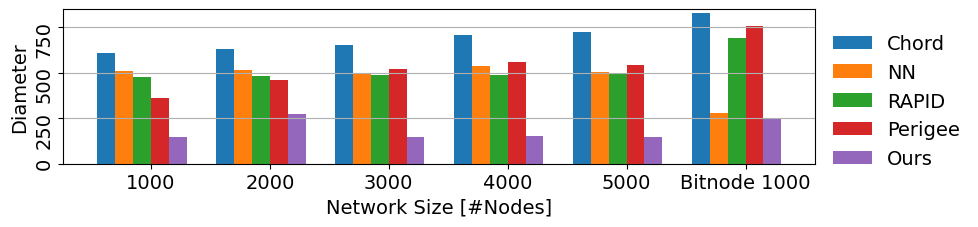

In [40]:
import matplotlib
font = {
        'size'   : 14}
matplotlib.rc('font', **font)
labels = ['Chord', 'NN', 'RAPID', 'Perigee', 'Ours']
hatches = ["x", "/", ".", "\\",'']
tab10 = sns.color_palette("tab10", n_colors=5)
face_colors = tab10
x = np.arange(6)
x_tickslabel = ['1000', '2000', '3000', '4000', '5000', 'Bitnode 1000']
width = 0.15

fig, ax = plt.subplots(figsize=(10, 2.5))
for i, label in enumerate(labels):
    ax.bar(x + i*width, data[label], width, label=label, color=face_colors[i])
ax.set_ylabel('Diameter')
ax.set_yticks([0, 250, 500, 750, 1000])
# ax.set_yticklabels(['0', '2.5', '5', '7.5', '10'])
ax.set_yticklabels(['0', '250', '500', '750', '1000'], rotation=90)
# ax.set_title('Diameter of different algorithms')
ax.set_xticks(x + 2.5*width)
ax.set_xticklabels(x_tickslabel)
ax.set_xlabel('Network Size [#Nodes]')
ax.legend(loc='upper left', bbox_to_anchor=(1.0, .95), frameon=False)
ax.grid(axis='y')
ax.set_ylim([0, 850])
plt.tight_layout()
# plt.show()
plt.savefig("diameter.png", bbox_inches='tight',)
# plt.savefig("diameter.pdf", bbox_inches='tight')


In [1]:
import qrcode

# URL of the GitHub repository
url = "https://github.com/swarm-workflows"

# Generate QR code
qr = qrcode.QRCode(
    version=1,
    error_correction=qrcode.constants.ERROR_CORRECT_L,
    box_size=10,
    border=4,
)
qr.add_data(url)
qr.make(fit=True)

# Create an image from the QR Code instance
img = qr.make_image(fill_color="black", back_color="white")
print(img)


In [2]:
data = {'chord_shortest_ring': [28.262380685871165, 33.83343845055416, 36.80272650385673, 35.32956629410444, 39.234748643841066, 34.95843391512173, 37.768245782987975, 40.2644375981636, 41.83391892948736, 36.464708856234495, 36.40087270423675], 'chord_random_ring': [29.392086408375583, 36.85077953277981, 39.30679204738034, 38.675835907620296, 42.49867342665982, 39.35142448562006, 41.37720228959562, 43.78784865474357, 45.038292998107735, 40.63821354732185, 41.167721527822465], 'nearest_neighbour_shortest_ring': [16.475104958513363, 20.055399163488932, 21.569938547144304, 21.877343468299095, 22.172967575369782, 22.683247198226805, 22.891097755953446, 23.052881429739465, 23.284528743664964, 23.66943824501755, 23.668511416402552], 'nearest_neighbour_random_ring': [12.548711254113723, 13.673151686267726, 15.224271409410154, 13.739807202323501, 14.729963855900355, 13.696791233980388, 14.055464853368886, 13.770506692228906, 13.628485022561268, 13.739640201855039, 13.571078603970493], 'K_ring_shortest_ring': [16.66657984025268, 19.55596605215894, 20.75232664131655, 21.686732036266264, 21.881465408246918, 23.00067229359763, 22.77896904485963, 23.33835285627402, 22.775558604069502, 23.387646917457527, 23.325480813428705], 'K_ring_random_ring': [18.7591501667967, 22.38931339418201, 24.207707077368767, 25.48117013289871, 26.24786005840055, 26.589223964098867, 27.714279083291494, 27.672705342654222, 27.880391708844083, 28.39976282942855, 28.93032315965007], 'K_ring_greedy': [12.099343640569106, 12.355738902689936, 12.452506681863984, 12.045200360810943, 12.132189258604644, 11.848618530319994, 11.92745853758452, 11.811056066662259, 11.676745168820762, 11.424633155679079, 11.443119528845891], 'K_ring_epsilon_greedy': [12.19614203055999, 13.002758662720478, 12.600079935578563, 12.572511175666365, 12.450823644195733, 12.074428267414774, 12.154567661596204, 12.069159188768115, 12.045097935781898, 12.017719574865042, 12.37162453130453]}
data['Chord'] = data['chord_random_ring']
data['Chord_Hamilton'] = data['chord_shortest_ring']
data['NN'] = data['nearest_neighbour_shortest_ring']
data['NN_Hamilton'] = data['nearest_neighbour_random_ring']
data['Perigee'] = data['nearest_neighbour_shortest_ring']
data['Perigee_Hamilton'] = data['nearest_neighbour_random_ring']
data['RAPID'] = data['K_ring_random_ring']
# data['Perigee'] = data_perigee
data['Ours'] = data['K_ring_shortest_ring']
data['Ours_greedy'] = data['K_ring_greedy']

In [7]:
data_gaussian = {'chord_shortest_ring': [14.980182390334999, 24.490774378587716, 27.59540647542554, 26.640316823186946, 31.089368158730363, 31.390815236949678, 30.289412152416542, 30.003840131386486, 33.79476948021938, 34.287889220710255, 34.1998689889897, 30.433477953405152, 32.395645545929355, 31.484744784554678, 32.599518161934206, 32.96930806653888, 35.81275508022222, 35.40071468244394, 37.52051299397345, 35.95550479345518, 36.59147503353368], 'chord_random_ring': [14.218662992582889, 25.379713649573592, 29.745948882996043, 28.278755948099242, 32.95795948815675, 33.42920433391514, 31.352265071492635, 32.934293807624165, 36.743206097122425, 36.40219388577873, 37.218499382039205, 32.656621838123975, 34.560452923300055, 33.7790368599341, 35.6737578915266, 36.13223054024883, 38.023293714184796, 38.423581763725274, 39.85237179448408, 39.684106883264846, 39.41488188993464], 'nearest_neighbour_shortest_ring': [17.88049460728012, 18.76952519964239, 18.027897991224634, 18.806729551668717, 19.40492863276795, 18.93442696197502, 18.491937781873425, 19.650786520701388, 19.446617713054287, 19.826460768088303, 19.763783149320602, 19.088444340845328, 19.600558069706704, 19.528561681508883, 19.54313575306908, 19.908090658042397, 19.620361959499593, 20.299597705319837, 20.01771812748395, 20.41534736377834, 20.274003632107267], 'nearest_neighbour_random_ring': [17.49002160884475, 14.769193517574536, 14.468166649311033, 14.224173615950551, 13.813388706517884, 13.91310744797326, 13.517007319095603, 15.001432250091444, 13.7115028345006, 14.447891088512925, 13.895419699343591, 13.218001369309714, 13.102927605027395, 13.696815250145779, 13.51157153378191, 13.351435902677602, 13.344238912561858, 13.944366889263893, 13.396235511121617, 12.832678793754045, 13.656864514258862], 'K_ring_shortest_ring': [14.851779298155904, 17.700439118439824, 19.535300642410373, 18.306009268294233, 19.042281317247994, 19.54407149317513, 18.7967271875113, 18.90441293699241, 18.819332117644844, 19.657597076363537, 19.772498565346535, 19.12849095103637, 19.562671813775005, 19.625408071766785, 19.783931377369743, 19.797513095029757, 19.83827444420033, 19.725957824080663, 19.920130471571674, 20.322647085882984, 20.196832764261035], 'K_ring_random_ring': [17.113593510831976, 19.873203605040356, 20.642301801539666, 20.129638579576923, 21.625570211176207, 21.79853015407059, 21.725980973293957, 22.111557040993745, 22.28038568446951, 22.561385958552258, 22.565935280910548, 21.718236187099834, 21.716943987617412, 22.059551108585385, 22.33019043326987, 22.100976725567392, 23.226240656251278, 22.57236046751093, 22.765136536752234, 23.052739404023207, 23.47766261991042], 'K_ring_greedy': [15.831094794240856, 14.521709109520394, 13.624370910768107, 13.337017932582883, 13.646373645560354, 13.92706231685813, 12.765407559532903, 12.730619345235024, 12.481614441391034, 12.477169878332, 12.256805485315986, 12.44126838097053, 12.139013262925555, 11.983824281136524, 11.916616340120443, 11.85831188779952, 12.031051374550444, 11.792208497490089, 12.037648316931886, 11.886425011113912, 11.703550887295034], 'K_ring_epsilon_greedy': [17.123253573809627, 15.254030106765473, 13.971613991227054, 13.34966703408717, 13.422843841170465, 14.36365649461522, 12.625911980615124, 12.68562004791881, 12.954810059489962, 13.109287551805005, 12.569202834667262, 12.071900073581968, 12.23695625444746, 12.405926973765336, 12.505249522451358, 12.020299740517528, 12.226667986109181, 12.469490448381599, 12.259903194653043, 12.178646242848938, 12.081669836878902]}
data_gaussian['Chord'] = data_gaussian['chord_random_ring']
data_gaussian['Chord_Hamilton'] = data_gaussian['chord_shortest_ring']
data_gaussian['NN'] = data_gaussian['nearest_neighbour_shortest_ring']
data_gaussian['NN_Hamilton'] = data_gaussian['nearest_neighbour_random_ring']
data_gaussian['Perigee'] = data_gaussian['nearest_neighbour_shortest_ring']
data_gaussian['Perigee_Hamilton'] = data_gaussian['nearest_neighbour_random_ring']
data_gaussian['RAPID'] = data_gaussian['K_ring_random_ring']
# data['Perigee'] = data_perigee
data_gaussian['Ours'] = data_gaussian['K_ring_shortest_ring']
data_gaussian['Ours_greedy'] = data_gaussian['K_ring_greedy']

In [8]:
data_uniform =  {'chord_shortest_ring': [13, 17, 19, 18, 18, 19, 17, 17, 17, 19, 21, 18, 16, 17, 18, 19, 19, 18, 21, 20, 20], 'chord_random_ring': [14, 22, 23, 21, 23, 25, 24, 23, 24, 25, 26, 22, 23, 22, 23, 23, 25, 25, 25, 26, 25], 'nearest_neighbour_shortest_ring': [21, 19, 18, 18, 19, 20, 20, 22, 24, 26, 26, 27, 26, 28, 36, 38, 39, 43, 44, 43, 46], 'nearest_neighbour_random_ring': [12, 11, 11, 9, 10, 9, 10, 10, 11, 14, 14, 12, 14, 14, 17, 16, 18, 19, 20, 19, 21], 'K_ring_shortest_ring': [18, 17, 14, 15, 16, 15, 14, 13, 14, 16, 13, 13, 14, 13, 13, 14, 15, 14, 14, 13, 14], 'K_ring_random_ring': [19, 20, 22, 21, 22, 20, 20, 20, 21, 22, 23, 21, 21, 21, 21, 22, 21, 21, 21, 22, 23], 'K_ring_greedy': [7, 8, 6, 7, 7, 7, 7, 8, 8, 8, 9, 8, 8, 9, 10, 9, 10, 9, 11, 10, 12], 'K_ring_epsilon_greedy': [17, 9, 6, 6, 5, 9, 6, 6, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 9, 8]}
data_uniform['Chord'] = data_uniform['chord_random_ring']
data_uniform['Chord_Hamilton'] = data_uniform['chord_shortest_ring']
data_uniform['NN'] = data_uniform['nearest_neighbour_shortest_ring']
data_uniform['NN_Hamilton'] = data_uniform['nearest_neighbour_random_ring']
data_uniform['Perigee'] = data_uniform['nearest_neighbour_shortest_ring']
data_uniform['Perigee_Hamilton'] = data_uniform['nearest_neighbour_random_ring']
data_uniform['RAPID'] = data_uniform['K_ring_random_ring']
# data['Perigee'] = data_perigee
data_uniform['Ours'] = data_uniform['K_ring_shortest_ring']
data_uniform['Ours_greedy'] = data_uniform['K_ring_greedy']

In [9]:
data_uniform_3 = {'chord_shortest_ring': [18, 29, 33, 31, 35, 37, 35, 36, 39, 40, 41, 35, 39, 38, 40, 40, 43, 42, 43, 44, 44], 'chord_random_ring': [16, 28, 33, 32, 35, 38, 36, 36, 39, 40, 40, 36, 39, 38, 40, 40, 43, 43, 45, 44, 46], 'nearest_neighbour_shortest_ring': [21, 29, 51, 55, 88, 89, 92, 96, 127, 184, 145, 163, 161, 224, 194, 241, 295, 285, 315, 423, 340], 'nearest_neighbour_random_ring': [22, 26, 44, 50, 77, 85, 97, 97, 141, 168, 159, 165, 191, 235, 201, 317, 359, 343, 417, 461, 398], 'K_ring_shortest_ring': [17, 22, 21, 22, 22, 23, 22, 23, 23, 23, 24, 23, 23, 23, 23, 23, 24, 24, 24, 24, 24], 'K_ring_random_ring': [20, 21, 23, 23, 24, 24, 23, 24, 24, 24, 25, 25, 24, 25, 24, 25, 25, 25, 25, 25, 26], 'K_ring_greedy': [20, 21, 28, 28, 32, 36, 36, 37, 44, 45, 48, 52, 52, 56, 57, 60, 64, 68, 68, 80, 78], 'K_ring_epsilon_greedy': [19, 19, 20, 21, 24, 28, 28, 28, 32, 36, 37, 40, 40, 40, 43, 48, 49, 50, 52, 56, 56]}
data_uniform_3['Chord'] = data_uniform_3['chord_random_ring']
data_uniform_3['Chord_Hamilton'] = data_uniform_3['chord_shortest_ring']
data_uniform_3['NN'] = data_uniform_3['nearest_neighbour_shortest_ring']
data_uniform_3['NN_Hamilton'] = data_uniform_3['nearest_neighbour_random_ring']
data_uniform_3['Perigee'] = data_uniform_3['nearest_neighbour_shortest_ring']
data_uniform_3['Perigee_Hamilton'] = data_uniform_3['nearest_neighbour_random_ring']
data_uniform_3['RAPID'] = data_uniform_3['K_ring_random_ring']
# data['Perigee'] = data_perigee
data_uniform_3['Ours'] = data_uniform_3['K_ring_shortest_ring']
data_uniform_3['Ours_greedy'] = data_uniform_3['K_ring_greedy']

0 [15.831094794240856, 14.521709109520394, 13.624370910768107, 13.337017932582883, 13.646373645560354, 13.92706231685813, 12.765407559532903, 12.730619345235024, 12.481614441391034, 12.477169878332, 12.256805485315986, 12.44126838097053, 12.139013262925555, 11.983824281136524, 11.916616340120443, 11.85831188779952, 12.031051374550444, 11.792208497490089, 12.037648316931886, 11.886425011113912, 11.703550887295034]
Chord [14.218662992582889, 25.379713649573592, 29.745948882996043, 28.278755948099242, 32.95795948815675, 33.42920433391514, 31.352265071492635, 32.934293807624165, 36.743206097122425, 36.40219388577873, 37.218499382039205, 32.656621838123975, 34.560452923300055, 33.7790368599341, 35.6737578915266, 36.13223054024883, 38.023293714184796, 38.423581763725274, 39.85237179448408, 39.684106883264846, 39.41488188993464]
Perigee [17.88049460728012, 18.76952519964239, 18.027897991224634, 18.806729551668717, 19.40492863276795, 18.93442696197502, 18.491937781873425, 19.650786520701388, 1

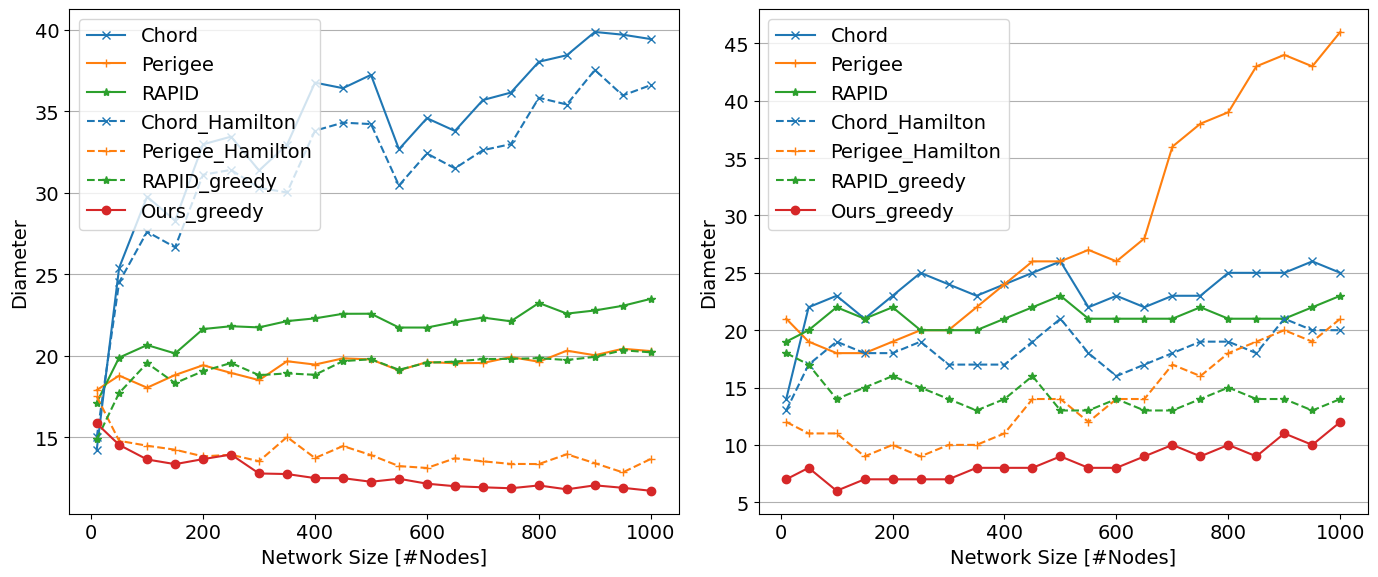

In [29]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
font = {
        'size'   : 14}
matplotlib.rc('font', **font)
N_list = [10]
seed = 1
for i in range(50, 1001, 50):
    N_list.append(i)
# labels = ['Chord', 'NN', 'RAPID', 'Perigee', 'Ours']
labels = ['Chord', 'Perigee', 'RAPID']
hatches = ["x", "/", ".", "\\",'']
tab10 = sns.color_palette("tab10", n_colors=5)
face_colors = tab10
x_tickslabel = N_list
width = 0.15
markers = ['x', '+', '*', 'o', 'P']
fig, axs = plt.subplots(ncols=2, figsize=(14, 6))
datas = [data_gaussian, data_uniform, data_uniform_3]
for j in range(2):
	ax = axs[j]
	data = datas[j]
	print(j, data['Ours_greedy'])
	for i, label in enumerate(labels):
		print(label, data[label])
		ax.plot(N_list, data[label], label=label, color=face_colors[i], marker=markers[i])
	ax.plot(N_list, data['Chord_Hamilton'], linestyle='--',label='Chord_Hamilton', 
			color=face_colors[0], marker=markers[0])
	ax.plot(N_list, data['Perigee_Hamilton'], linestyle='--',
			label='Perigee_Hamilton', color=face_colors[1], marker=markers[1])
	ax.plot(N_list, data['Ours'], linestyle='--',label='RAPID_greedy',
			color=face_colors[2], marker=markers[2])
	ax.plot(N_list, data['Ours_greedy'], label='Ours_greedy',
			color=face_colors[3], marker=markers[3])
	ax.set_ylabel('Diameter')
	# ax.set_yticks([0, 250, 500, 750, 1000])
	# ax.set_yticklabels(['0', '2.5', '5', '7.5', '10'])
	# ax.set_yticklabels(['0', '250', '500', '750', '1000'], rotation=90)
	# ax.set_title('Diameter of different algorithms')
	# ax.set_xticks(x + 2.5*width)
	# ax.set_xticklabels(x_tickslabel)
	ax.set_xlabel('Network Size [#Nodes]')
	# ax.legend(loc='upper left', bbox_to_anchor=(1.0, .95), frameon=False)
	ax.legend()
	ax.grid(axis='y')
	# ax.set_ylim([0, 850])
	plt.tight_layout()
	# plt.show()
	# plt.savefig("diameter.png", bbox_inches='tight',)
	# plt.savefig("diameter.pdf", bbox_inches='tight')


In [23]:
# Ablation
data_uniform_varying_random_ring = {'chord_shortest_ring': [], 'chord_random_ring': [], 'nearest_neighbour_shortest_ring': [], 'nearest_neighbour_random_ring': [], 'K_ring_shortest_ring': [], 'K_ring_random_ring': [], 'K_ring_greedy': [], 'K_ring_epsilon_greedy': [], 'K_ring_0_random': [9, 7, 6, 6, 7, 7, 7, 7, 8, 9, 9, 9, 10, 10, 9, 12, 12, 13, 14, 14, 14], 'K_ring_1_random': [11, 11, 6, 7, 8, 7, 7, 7, 8, 7, 8, 7, 7, 8, 9, 9, 8, 8, 8, 8, 8], 'K_ring_2_random': [12, 9, 8, 9, 7, 9, 7, 7, 8, 8, 8, 7, 7, 7, 9, 8, 7, 8, 8, 7, 8], 'K_ring_3_random': [23, 11, 9, 10, 9, 7, 8, 7, 8, 8, 8, 7, 8, 7, 8, 8, 8, 8, 8, 8, 8], 'K_ring_4_random': [0, 14, 10, 10, 9, 9, 8, 7, 8, 8, 9, 8, 7, 7, 8, 8, 8, 8, 8, 8, 8], 'K_ring_5_random': [0, 24, 13, 12, 12, 10, 9, 9, 9, 9, 10, 8, 9, 8, 9, 9, 9, 9, 9, 9, 8], 'K_ring_6_random': [0, 0, 21, 14, 14, 13, 10, 10, 11, 11, 11, 9, 9, 9, 10, 10, 11, 9, 9, 9, 11], 'K_ring_7_random': [0, 0, 0, 20, 20, 21, 13, 13, 15, 14, 14, 10, 11, 11, 11, 10, 10, 12, 11, 12, 11], 'K_ring_8_random': [0, 0, 0, 0, 0, 0, 21, 23, 22, 21, 22, 15, 13, 13, 14, 14, 14, 14, 14, 13, 14], 'K_ring_9_random': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 21, 21, 21, 21, 20, 21, 22, 22, 22, 22]}

In [24]:
data_gaussian_varying_random_ring = {'chord_shortest_ring': [], 'chord_random_ring': [], 'nearest_neighbour_shortest_ring': [], 'nearest_neighbour_random_ring': [], 'K_ring_shortest_ring': [], 'K_ring_random_ring': [], 'K_ring_greedy': [], 'K_ring_epsilon_greedy': [], 'K_ring_0_random': [16.501647112013316, 14.061283566705363, 14.121893200252565, 13.113245382915661, 12.839627249975095, 13.738080578843837, 12.430453946483807, 12.298290579920845, 12.515972776029772, 12.708756431223915, 12.252590189537404, 11.882168822532936, 11.722911784769458, 11.940080809585094, 12.310953195604066, 11.75634391175803, 11.73722616390091, 11.75935954280106, 11.860194090815096, 11.912712334136932, 11.979579019085143], 'K_ring_1_random': [18.35426463790561, 15.363083967229377, 14.63735691335972, 14.097635815181523, 13.574631553779138, 14.771274851701799, 13.083717040168844, 12.997300228922834, 12.91620937861286, 13.000229456839122, 13.146589994707174, 12.341185057850712, 12.815945112107228, 12.101509029537485, 12.293017132859571, 12.135121707294683, 12.412655182386054, 12.351553879258859, 12.028644822977395, 12.403465218420026, 12.229067513366868], 'K_ring_2_random': [15.122935783885843, 16.154152085685187, 14.916762471142922, 13.972799125278389, 14.534110304245896, 14.830590742241116, 13.565241864193816, 13.51377185136305, 13.456497273220291, 13.723680960643593, 13.632176327903318, 12.899711263609198, 12.722500643842366, 12.723240116104433, 12.648730781681266, 12.685308133049551, 12.974251381304128, 12.755369431566361, 12.775876105002297, 12.625800361254244, 12.818196583444077], 'K_ring_3_random': [18.11697441747252, 17.561196700053454, 15.714112724149953, 15.322562480906967, 15.72154809040481, 15.490863655361444, 14.26433340204662, 14.25189223905376, 14.652200727721157, 14.598236543671925, 14.292761715549549, 13.399826079328808, 13.19793182660252, 13.127140225496134, 13.311822371102922, 14.03703191959418, 13.714362805651263, 13.656302190323332, 13.22604687035625, 13.75592443277058, 13.576055894390198], 'K_ring_4_random': [0, 18.701388873104044, 17.469001813706434, 15.788068272780944, 16.075206569998958, 16.162471174383228, 15.720620450224814, 15.548618898961418, 15.287940069682074, 15.079644877059414, 15.39926221192352, 14.046507635177491, 14.161797557054278, 14.074535938101448, 14.334058114037997, 14.130672611228896, 14.485805901697585, 14.194621854020127, 14.281656491793445, 14.600932317758762, 14.13075062141769], 'K_ring_5_random': [0, 19.789581175834346, 19.193524969012117, 17.02000046439277, 17.39897449596371, 17.994990303974436, 16.280943965525385, 16.584339274051562, 16.559393995360747, 16.571729880535834, 16.572499360849136, 15.092688524972814, 15.074372205470091, 15.133585160047947, 15.054094546690525, 15.287555233068051, 15.483658935237075, 15.135230397553341, 15.85373679003369, 15.14800406241598, 15.316696567608936], 'K_ring_6_random': [0, 0, 22.349304920331896, 18.45458287368428, 19.090702182787442, 19.62168683742732, 17.318675849137417, 17.48369826944512, 17.720781859744037, 18.11780728323582, 18.403200340093647, 16.20399660010884, 16.52710956282667, 16.101926857297656, 16.223460867444736, 16.27609714565811, 16.491585895035485, 16.376501617004422, 16.446136797972308, 16.640460146351955, 16.54922971372997], 'K_ring_7_random': [0, 0, 0, 20.269455995447206, 21.660437844061413, 21.55231075286069, 19.488788778503775, 19.064571272542, 19.167078291359164, 19.708174536236214, 19.970085347882623, 17.46788800749051, 17.529913637849788, 17.71282593021634, 17.62076052683858, 17.83681921465879, 18.043193726824775, 18.175888610436164, 18.229671337482113, 18.44536115944149, 18.163789134608443], 'K_ring_8_random': [0, 0, 0, 0, 0, 0, 20.81829996651149, 21.7778960615418, 21.90653249725328, 22.148134945906552, 22.302000566479748, 19.16462990913353, 18.893655833279077, 19.137351655592386, 19.326244322853167, 19.578209350453786, 19.822001120833416, 19.833765542531644, 19.77915731350386, 19.81812345239896, 19.630331441459774], 'K_ring_9_random': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 21.740015836704984, 22.06713171739949, 22.121590677486736, 22.742348303761034, 22.36010445943767, 22.721323305840503, 22.495600182079443, 22.99894812932162, 23.324309980175215, 23.43843430947624]}

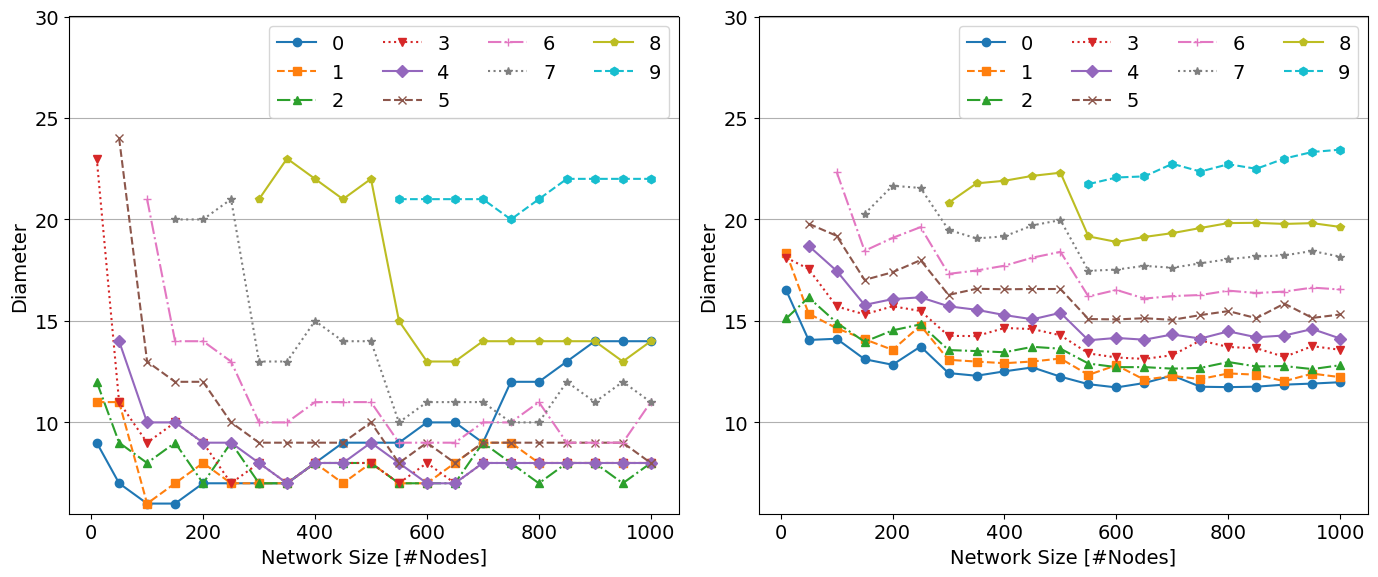

In [30]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
font = {
        'size'   : 14}
matplotlib.rc('font', **font)
N_list = [10]
seed = 1
for i in range(50, 1001, 50):
    N_list.append(i)
# labels = ['Chord', 'NN', 'RAPID', 'Perigee', 'Ours']
labels = ['Chord', 'Perigee', 'RAPID']
hatches = ["x", "/", ".", "\\",'']
tab10 = sns.color_palette("tab10", n_colors=10)
face_colors = tab10
x_tickslabel = N_list
width = 0.15
markers = ['x', '+', '*', 'o', 'P']
markers = ['o', 's', '^', 'v', 'D', 'x', '+', '*', 'p', 'h']
linestyles = ['-', '--', '-.', ':', '-', '--', '-.', ':', '-', '--']
fig, axs = plt.subplots(ncols=2, figsize=(14, 6))
datas = [data_gaussian, data_uniform, 
		 data_uniform_varying_random_ring,
		   data_gaussian_varying_random_ring]
for j in range(2):
	ax = axs[j]
	data = datas[j + 2]
	for i in range(10):
		# print(label, data[label])
		# print(len( data[f'K_ring_{i}_random']))
		k = 0
		while data[f'K_ring_{i}_random'][k] == 0:
			k += 1
		ax.plot(N_list[k:], data[f'K_ring_{i}_random'][k:], label=f'{i}', linestyle=linestyles[i], color=face_colors[i], marker=markers[i])
	ax.set_ylabel('Diameter')
	# ax.set_yticks([0, 250, 500, 750, 1000])
	# ax.set_yticklabels(['0', '2.5', '5', '7.5', '10'])
	# ax.set_yticklabels(['0', '250', '500', '750', '1000'], rotation=90)
	# ax.set_title('Diameter of different algorithms')
	# ax.set_xticks(x + 2.5*width)
	# ax.set_xticklabels(x_tickslabel)
	ax.set_ylim([5.5, 30])
	ax.set_xlabel('Network Size [#Nodes]')
	# ax.legend(loc='upper left', bbox_to_anchor=(1.0, .95), frameon=False)
	ax.legend(ncols=4)
	ax.grid(axis='y')
	# ax.set_ylim([0, 850])
	plt.tight_layout()
	# plt.show()
	# plt.savefig("diameter.png", bbox_inches='tight',)
	# plt.savefig("diameter.pdf", bbox_inches='tight')


In [32]:
data_distribute_uniform = {'chord_shortest_ring': [], 'chord_random_ring': [], 'nearest_neighbour_shortest_ring': [], 'nearest_neighbour_random_ring': [], 'K_ring_shortest_ring': [], 'K_ring_random_ring': [], 'K_ring_greedy': [], 'K_ring_epsilon_greedy': [], 'K_ring_random_distributed_stride_1': [19, 20, 22, 21, 22, 20, 20, 20, 21, 22, 23, 21, 21, 21, 21, 22, 21, 21, 21, 22, 23], 'K_ring_random_distributed_stride_2': [23, 21, 20, 20, 23, 23, 21, 20, 22, 21, 21, 21, 20, 19, 21, 21, 21, 21, 21, 22, 22], 'K_ring_random_distributed_stride_4': [15, 18, 17, 15, 16, 16, 15, 17, 17, 16, 18, 16, 15, 16, 15, 17, 15, 17, 17, 17, 16], 'K_ring_random_distributed_stride_8': [16, 14, 11, 10, 11, 11, 10, 11, 11, 12, 11, 10, 11, 11, 11, 10, 11, 10, 13, 11, 12], 'K_ring_random_distributed_stride_16': [14, 11, 9, 8, 8, 8, 8, 8, 7, 8, 8, 8, 7, 7, 8, 8, 8, 8, 8, 7, 8], 'K_ring_random_distributed_stride_32': [13, 10, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 6, 6], 'K_ring_random_distributed_stride_64': [12, 7, 6, 6, 6, 6, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 6, 5, 6], 'K_ring_random_distributed_stride_128': [9, 8, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5], 'K_ring_random_distributed_stride_256': [14, 7, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5], 'K_ring_random_distributed_stride_512': [10, 8, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]}

In [41]:
data_distribute_gaussian =  {'chord_shortest_ring': [], 'chord_random_ring': [], 'nearest_neighbour_shortest_ring': [], 'nearest_neighbour_random_ring': [], 'K_ring_shortest_ring': [], 'K_ring_random_ring': [], 'K_ring_greedy': [], 'K_ring_epsilon_greedy': [], 'K_ring_random_distributed_stride_1': [17.113593510831976, 19.873203605040356, 20.642301801539666, 20.129638579576923, 21.625570211176207, 21.79853015407059, 21.725980973293957, 22.111557040993745, 22.28038568446951, 22.561385958552258, 22.565935280910548, 21.718236187099834, 21.716943987617412, 22.059551108585385, 22.33019043326987, 22.100976725567392, 23.226240656251278, 22.57236046751093, 22.765136536752234, 23.052739404023207, 23.47766261991042], 'K_ring_random_distributed_stride_2': [18.11697441747252, 21.413585186688792, 21.199685386341947, 20.493760844792796, 21.843371362414466, 22.6001830128225, 20.7467936044633, 21.531967988617815, 21.766918307290865, 21.97342311802374, 22.327007824498516, 21.585464088182306, 21.90794611478765, 21.98579829034066, 21.955362916378697, 22.416006947164444, 22.49510164520663, 23.055666951916734, 23.126550822754126, 23.03801259044578, 23.07587497011833], 'K_ring_random_distributed_stride_4': [13.688866486721427, 18.158831079072865, 18.669485527805907, 19.26713839651717, 19.680213226232265, 20.17153461630919, 20.011405530261055, 19.810557961752423, 20.62274201488906, 21.22392833683613, 20.755377246411115, 20.414235016575535, 20.16447148101394, 20.44349834735487, 20.646946111232054, 20.780920887293675, 20.906064790853268, 21.542137098686364, 22.13004318722173, 21.72884696915855, 21.74747538334161], 'K_ring_random_distributed_stride_8': [15.817807155808174, 18.818242156922935, 17.621846257549336, 17.619948095234378, 18.08459383326121, 18.755046703962357, 17.35947501607761, 18.536552141418323, 18.26056475522499, 18.55674921249835, 19.101442473204248, 18.073749415498334, 18.61207904949521, 18.367983808698682, 19.006056387813103, 19.630576621992994, 19.818186226495573, 18.91074129082304, 19.447626108270995, 19.595970716190227, 19.504649368499102], 'K_ring_random_distributed_stride_16': [18.666903925091077, 17.434237657305673, 16.51972476100192, 16.663279898757317, 17.56124192065864, 16.80399621781904, 16.181985158342517, 16.543268592654442, 16.868195135020912, 17.27095531761732, 17.333651863917627, 16.869129750071874, 17.399558524156284, 16.772235129089644, 17.182093988732046, 16.939599000567092, 17.24794170984805, 17.49383536568639, 17.328262045201374, 17.776784586607178, 17.508532842305563], 'K_ring_random_distributed_stride_32': [19.908276177141158, 19.98906450038702, 16.512144680988605, 15.53388498480073, 15.881182054749145, 16.253115776943094, 15.561246072748077, 15.41932829569001, 15.675945222794379, 15.723192608421643, 15.725459287292356, 15.698610997222247, 15.675386101932133, 15.579735843854174, 15.34671100872901, 15.722476230212298, 15.84096420807857, 15.671860897654584, 16.415705263074024, 16.31957517518934, 16.107792858194475], 'K_ring_random_distributed_stride_64': [18.695442267409724, 26.803842846802684, 17.54932440850989, 16.148214081196198, 16.014875087388535, 15.316459721621083, 14.944994795382655, 14.69460661154416, 14.92806645982365, 14.844705783892305, 14.874231011993214, 14.587343511757718, 14.444797807811714, 14.371004829012605, 14.650027011668076, 14.640640532674082, 14.848221021462924, 14.773760540548864, 14.893410825163667, 14.787858969668168, 14.966855436806636], 'K_ring_random_distributed_stride_128': [25.904674558220584, 30.394410175629034, 36.51891811099723, 19.804434734917518, 17.55338478963684, 16.211505160872367, 14.887530788198443, 14.725139471462564, 14.804313644898674, 14.989394970541419, 14.437680928668868, 13.961296432705952, 13.864322145659981, 13.963033814990055, 13.902869711631348, 13.839365192986532, 13.979760790453415, 13.895128313465946, 14.204692804831186, 13.872136630157827, 14.252825602822497], 'K_ring_random_distributed_stride_256': [25.803255249843236, 29.254190417253383, 32.392756185101355, 54.439385398493265, 53.17638994528262, 39.76620906862606, 18.4650538074715, 16.78661697925271, 16.36453113289348, 16.05997841765479, 15.722157598048318, 15.120934413677308, 14.728245050373722, 14.014586991367597, 14.221604366203293, 13.970034978427865, 14.263481748354591, 13.921000800157447, 13.666160185941173, 13.931701869086154, 13.515311634419657], 'K_ring_random_distributed_stride_512': [38.446051954889406, 53.392521684022384, 35.51832551971695, 85.06376517623254, 48.088540067733824, 35.3203522071871, 39.656914414405385, 75.59237186786471, 47.376951966921666, 64.10541749922498, 47.711579357901634, 23.08337818868475, 18.200539651677758, 16.321123220548422, 15.823172281982714, 15.871500857082365, 15.11512748041999, 14.885160986823912, 14.858784598914971, 15.120982437269427, 15.278944025851748]}

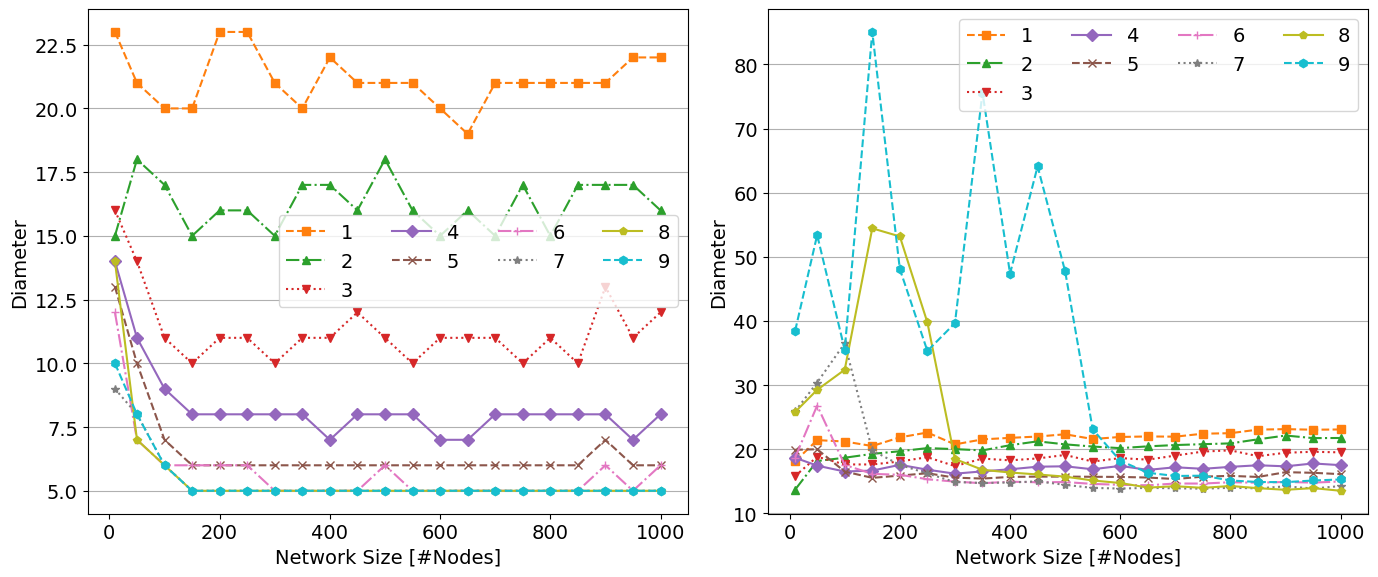

In [42]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
font = {
        'size'   : 14}
matplotlib.rc('font', **font)
N_list = [10]
seed = 1
for i in range(50, 1001, 50):
    N_list.append(i)
# labels = ['Chord', 'NN', 'RAPID', 'Perigee', 'Ours']
labels = ['Chord', 'Perigee', 'RAPID']
hatches = ["x", "/", ".", "\\",'']
tab10 = sns.color_palette("tab10", n_colors=10)
face_colors = tab10
x_tickslabel = N_list
width = 0.15
markers = ['x', '+', '*', 'o', 'P']
markers = ['o', 's', '^', 'v', 'D', 'x', '+', '*', 'p', 'h']
linestyles = ['-', '--', '-.', ':', '-', '--', '-.', ':', '-', '--']
fig, axs = plt.subplots(ncols=2, figsize=(14, 6))
datas = [data_distribute_uniform, data_distribute_gaussian]
for j in range(2):
	ax = axs[j]
	data = datas[j]
	for i in range(1, 10):
		# print(label, data[label])
		# print(len( data[f'K_ring_{i}_random']))
		# print(len(N_list), len(data[f'K_ring_random_distributed_stride_{i}']))
		ax.plot(N_list, data[f'K_ring_random_distributed_stride_{2 ** i}'], label=f'{i}', linestyle=linestyles[i], color=face_colors[i], marker=markers[i])
	ax.set_ylabel('Diameter')
	# ax.set_yticks([0, 250, 500, 750, 1000])
	# ax.set_yticklabels(['0', '2.5', '5', '7.5', '10'])
	# ax.set_yticklabels(['0', '250', '500', '750', '1000'], rotation=90)
	# ax.set_title('Diameter of different algorithms')
	# ax.set_xticks(x + 2.5*width)
	# ax.set_xticklabels(x_tickslabel)
	# ax.set_ylim([5.5, 30])
	ax.set_xlabel('Network Size [#Nodes]')
	# ax.legend(loc='upper left', bbox_to_anchor=(1.0, .95), frameon=False)
	ax.legend(ncols=4)
	ax.grid(axis='y')
	# ax.set_ylim([0, 850])
	plt.tight_layout()
	# plt.show()
	# plt.savefig("diameter.png", bbox_inches='tight',)
	# plt.savefig("diameter.pdf", bbox_inches='tight')


In [5]:
location_name = [
    "RUTG", "EDUKY", "MASS", "SRI", "PRIN", "TOKY", "CERN", 
    "DALL", "STAR", "UTAH", "MICH", "MAX", "AMST", "PSC", 
    "GATECH", "HAWI", "NCSA"
]
locations = {}
locations["RUTG"] = {"RUTG":0, "EDUKY":11.5, "MASS":9.3, "SRI":37, "PRIN":1.2, "TOKY":84.6, "CERN":46, 
    "DALL":18, "STAR":12, "UTAH":27.5, "MICH":14.4, "MAX":4.25, "AMST":45.09, "PSC":6.06, 
    "GATECH":10.08, "HAWI":57.9, "NCSA":22.3}
locations["EDUKY"] = {"RUTG":0, "EDUKY":0, "MASS":15, "SRI":30.2, "PRIN":16.85, "TOKY":80, "CERN":51, "DALL":23.1, "STAR":4.75, "UTAH":20.1, "MICH":7.3, "MAX":9.38, "AMST":70.85, "PSC":11.3, 
    "GATECH":15.25, "HAWI":50.72, "NCSA":15.1}

locations["MASS"] = {"RUTG":0, "EDUKY":0, "MASS":0, "SRI":42.5, "PRIN":9.5, "TOKY":88.6, "CERN":60.8, "DALL":21.3, "STAR":15.2, "UTAH":28.8, "MICH":15.93, "MAX":9.38, "AMST":60.7, "PSC":11.2, 
    "GATECH":15.3, "HAWI":61.2, "NCSA":23.8}
locations["SRI"] = {"RUTG":0, "EDUKY":0, "MASS":0, "SRI":0, "PRIN":37.5, "TOKY":53.5, "CERN":82.4, "DALL":22.3, "STAR":25.5, "UTAH":10.2, "MICH":28, "MAX":37.3, "AMST":81.5, "PSC":40, 
    "GATECH":15.3, "HAWI":43, "NCSA":35.8}
locations["PRIN"] = {"RUTG":0, "EDUKY":0, "MASS":0, "SRI":0, "PRIN":0, "TOKY":84.8, "CERN":46.1, "DALL":18.25, "STAR":12.1, "UTAH":27.5, "MICH":14.6, "MAX":4.3, "AMST":45.5, "PSC":6.26, 
    "GATECH":10.3, "HAWI":71.7, "NCSA":22.46}
locations["TOKY"] = {"RUTG":0, "EDUKY":0, "MASS":0, "SRI":0, "PRIN":0, "TOKY":0, "CERN":130.1, "DALL":67, "STAR":75, "UTAH":55.65, "MICH":77.8, "MAX":81, "AMST":128.7, "PSC":80.9, 
    "GATECH":85, "HAWI":74, "NCSA":83}
locations["CERN"] = {"RUTG":0, "EDUKY":0, "MASS":0, "SRI":0, "PRIN":0, "TOKY":0, "CERN":0, "DALL":69.5, "STAR":57, "UTAH":72.3, "MICH":59.45, "MAX":44, "AMST":8.3, "PSC":57.5, 
    "GATECH":52.3, "HAWI":116.6, "NCSA":67}
locations["DALL"] = {"RUTG":0, "EDUKY":0, "MASS":0, "SRI":0, "PRIN":0, "TOKY":0, "CERN":0, "DALL":0, "STAR":17.5, "UTAH":24, "MICH":12.2, "MAX":15.5, "AMST":61.4, "PSC":17.4, 
    "GATECH":21.4, "HAWI":41.7, "NCSA":12.4}
locations["STAR"] = {"RUTG":0, "EDUKY":0, "MASS":0, "SRI":0, "PRIN":0, "TOKY":0, "CERN":0, "DALL":0, "STAR":0, "UTAH":15.45, "MICH":2.6, "MAX":8.3, "AMST":56, "PSC":10.1, 
    "GATECH":14.4, "HAWI":46, "NCSA":10.4}
locations["UTAH"] = {"RUTG":0, "EDUKY":0, "MASS":0, "SRI":0, "PRIN":0, "TOKY":0, "CERN":0, "DALL":0, "STAR":0, "UTAH":0, "MICH":18, "MAX":24.46, "AMST":71.4, "PSC":25.6, 
    "GATECH":29.5, "HAWI":44.4, "NCSA":25.77}
locations["MICH"] = {"RUTG":0, "EDUKY":0, "MASS":0, "SRI":0, "PRIN":0, "TOKY":0, "CERN":0, "DALL":0, "STAR":0, "UTAH":0, "MICH":0, "MAX":10.8, "AMST":58.6, "PSC":12.7, 
    "GATECH":16.7, "HAWI":62.26, "NCSA":12.92}
locations["MAX"] = {"RUTG":0, "EDUKY":0, "MASS":0, "SRI":0, "PRIN":0, "TOKY":0, "CERN":0, "DALL":0, "STAR":0, "UTAH":0, "MICH":0, "MAX":0, "AMST":63.92, "PSC":4.26, 
    "GATECH":8.28, "HAWI":57.8, "NCSA":18.6}
locations["AMST"] = {"RUTG":0, "EDUKY":0, "MASS":0, "SRI":0, "PRIN":0, "TOKY":0, "CERN":0, "DALL":0, "STAR":0, "UTAH":0, "MICH":0, "MAX":0, "AMST":0, "PSC":50.3, 
    "GATECH":54.2, "HAWI":115.7, "NCSA":66.45}
locations["PSC"] = {"RUTG":0, "EDUKY":0, "MASS":0, "SRI":0, "PRIN":0, "TOKY":0, "CERN":0, "DALL":0, "STAR":0, "UTAH":0, "MICH":0, "MAX":0, "AMST":0, "PSC":0, 
    "GATECH":10.13, "HAWI":59.72, "NCSA":20.46}
locations["GATECH"] = {"RUTG":0, "EDUKY":0, "MASS":0, "SRI":0, "PRIN":0, "TOKY":0, "CERN":0, "DALL":0, "STAR":0, "UTAH":0, "MICH":0, "MAX":0, "AMST":0, "PSC":0, 
    "GATECH":0, "HAWI":80.14, "NCSA":24.5}
locations["HAWI"] = {"RUTG":0, "EDUKY":0, "MASS":0, "SRI":0, "PRIN":0, "TOKY":0, "CERN":0, "DALL":0, "STAR":0, "UTAH":0, "MICH":0, "MAX":0, "AMST":0, "PSC":0, 
    "GATECH":0, "HAWI":0, "NCSA":74}
locations["NCSA"] = {"RUTG":0, "EDUKY":0, "MASS":0, "SRI":0, "PRIN":0, "TOKY":0, "CERN":0, "DALL":0, "STAR":0, "UTAH":0, "MICH":0, "MAX":0, "AMST":0, "PSC":0, 
    "GATECH":0, "HAWI":0, "NCSA":0}


In [6]:
location_name = [
    "RUTG", "EDUKY", "MASS", "SRI", "PRIN", "TOKY", "CERN", 
    "DALL", "STAR", "UTAH", "MICH", "MAX", "AMST", "PSC", 
    "GATECH", "HAWI", "NCSA"
]
locations = {}
locations["RUTG"] = {"RUTG":0, "EDUKY":11.5, "MASS":9.3, "SRI":37, "PRIN":1.2, "TOKY":84.6, "CERN":46, 
    "DALL":18, "STAR":12, "UTAH":27.5, "MICH":14.4, "MAX":4.25, "AMST":45.09, "PSC":6.06, 
    "GATECH":10.08, "HAWI":57.9, "NCSA":22.3}
locations["EDUKY"] = {"RUTG":0, "EDUKY":0, "MASS":15, "SRI":30.2, "PRIN":16.85, "TOKY":80, "CERN":51, "DALL":23.1, "STAR":4.75, "UTAH":20.1, "MICH":7.3, "MAX":9.38, "AMST":70.85, "PSC":11.3, 
    "GATECH":15.25, "HAWI":50.72, "NCSA":15.1}

locations["MASS"] = {"RUTG":0, "EDUKY":0, "MASS":0, "SRI":42.5, "PRIN":9.5, "TOKY":88.6, "CERN":60.8, "DALL":21.3, "STAR":15.2, "UTAH":28.8, "MICH":15.93, "MAX":9.38, "AMST":60.7, "PSC":11.2, 
    "GATECH":15.3, "HAWI":61.2, "NCSA":23.8}
locations["SRI"] = {"RUTG":0, "EDUKY":0, "MASS":0, "SRI":0, "PRIN":37.5, "TOKY":53.5, "CERN":82.4, "DALL":22.3, "STAR":25.5, "UTAH":10.2, "MICH":28, "MAX":37.3, "AMST":81.5, "PSC":40, 
    "GATECH":15.3, "HAWI":43, "NCSA":35.8}
locations["PRIN"] = {"RUTG":0, "EDUKY":0, "MASS":0, "SRI":0, "PRIN":0, "TOKY":84.8, "CERN":46.1, "DALL":18.25, "STAR":12.1, "UTAH":27.5, "MICH":14.6, "MAX":4.3, "AMST":45.5, "PSC":6.26, 
    "GATECH":10.3, "HAWI":71.7, "NCSA":22.46}
locations["TOKY"] = {"RUTG":0, "EDUKY":0, "MASS":0, "SRI":0, "PRIN":0, "TOKY":0, "CERN":130.1, "DALL":67, "STAR":75, "UTAH":55.65, "MICH":77.8, "MAX":81, "AMST":128.7, "PSC":80.9, 
    "GATECH":85, "HAWI":74, "NCSA":83}
locations["CERN"] = {"RUTG":0, "EDUKY":0, "MASS":0, "SRI":0, "PRIN":0, "TOKY":0, "CERN":0, "DALL":69.5, "STAR":57, "UTAH":72.3, "MICH":59.45, "MAX":44, "AMST":8.3, "PSC":57.5, 
    "GATECH":52.3, "HAWI":116.6, "NCSA":67}
locations["DALL"] = {"RUTG":0, "EDUKY":0, "MASS":0, "SRI":0, "PRIN":0, "TOKY":0, "CERN":0, "DALL":0, "STAR":17.5, "UTAH":24, "MICH":12.2, "MAX":15.5, "AMST":61.4, "PSC":17.4, 
    "GATECH":21.4, "HAWI":41.7, "NCSA":12.4}
locations["STAR"] = {"RUTG":0, "EDUKY":0, "MASS":0, "SRI":0, "PRIN":0, "TOKY":0, "CERN":0, "DALL":0, "STAR":0, "UTAH":15.45, "MICH":2.6, "MAX":8.3, "AMST":56, "PSC":10.1, 
    "GATECH":14.4, "HAWI":46, "NCSA":10.4}
locations["UTAH"] = {"RUTG":0, "EDUKY":0, "MASS":0, "SRI":0, "PRIN":0, "TOKY":0, "CERN":0, "DALL":0, "STAR":0, "UTAH":0, "MICH":18, "MAX":24.46, "AMST":71.4, "PSC":25.6, 
    "GATECH":29.5, "HAWI":44.4, "NCSA":25.77}
locations["MICH"] = {"RUTG":0, "EDUKY":0, "MASS":0, "SRI":0, "PRIN":0, "TOKY":0, "CERN":0, "DALL":0, "STAR":0, "UTAH":0, "MICH":0, "MAX":10.8, "AMST":58.6, "PSC":12.7, 
    "GATECH":16.7, "HAWI":62.26, "NCSA":12.92}
locations["MAX"] = {"RUTG":0, "EDUKY":0, "MASS":0, "SRI":0, "PRIN":0, "TOKY":0, "CERN":0, "DALL":0, "STAR":0, "UTAH":0, "MICH":0, "MAX":0, "AMST":63.92, "PSC":4.26, 
    "GATECH":8.28, "HAWI":57.8, "NCSA":18.6}
locations["AMST"] = {"RUTG":0, "EDUKY":0, "MASS":0, "SRI":0, "PRIN":0, "TOKY":0, "CERN":0, "DALL":0, "STAR":0, "UTAH":0, "MICH":0, "MAX":0, "AMST":0, "PSC":50.3, 
    "GATECH":54.2, "HAWI":115.7, "NCSA":66.45}
locations["PSC"] = {"RUTG":0, "EDUKY":0, "MASS":0, "SRI":0, "PRIN":0, "TOKY":0, "CERN":0, "DALL":0, "STAR":0, "UTAH":0, "MICH":0, "MAX":0, "AMST":0, "PSC":0, 
    "GATECH":10.13, "HAWI":59.72, "NCSA":20.46}
locations["GATECH"] = {"RUTG":0, "EDUKY":0, "MASS":0, "SRI":0, "PRIN":0, "TOKY":0, "CERN":0, "DALL":0, "STAR":0, "UTAH":0, "MICH":0, "MAX":0, "AMST":0, "PSC":0, 
    "GATECH":0, "HAWI":80.14, "NCSA":24.5}
locations["HAWI"] = {"RUTG":0, "EDUKY":0, "MASS":0, "SRI":0, "PRIN":0, "TOKY":0, "CERN":0, "DALL":0, "STAR":0, "UTAH":0, "MICH":0, "MAX":0, "AMST":0, "PSC":0, 
    "GATECH":0, "HAWI":0, "NCSA":74}
locations["NCSA"] = {"RUTG":0, "EDUKY":0, "MASS":0, "SRI":0, "PRIN":0, "TOKY":0, "CERN":0, "DALL":0, "STAR":0, "UTAH":0, "MICH":0, "MAX":0, "AMST":0, "PSC":0, 
    "GATECH":0, "HAWI":0, "NCSA":0}

for i in range(len(location_name)):
    for j in range(i):
        locations[location_name[i]][location_name[j]] = locations[location_name[j]][location_name[i]]

{'RUTG': {'RUTG': 0,
  'EDUKY': 11.5,
  'MASS': 9.3,
  'SRI': 37,
  'PRIN': 1.2,
  'TOKY': 84.6,
  'CERN': 46,
  'DALL': 18,
  'STAR': 12,
  'UTAH': 27.5,
  'MICH': 14.4,
  'MAX': 4.25,
  'AMST': 45.09,
  'PSC': 6.06,
  'GATECH': 10.08,
  'HAWI': 57.9,
  'NCSA': 22.3},
 'EDUKY': {'RUTG': 11.5,
  'EDUKY': 0,
  'MASS': 15,
  'SRI': 30.2,
  'PRIN': 16.85,
  'TOKY': 80,
  'CERN': 51,
  'DALL': 23.1,
  'STAR': 4.75,
  'UTAH': 20.1,
  'MICH': 7.3,
  'MAX': 9.38,
  'AMST': 70.85,
  'PSC': 11.3,
  'GATECH': 15.25,
  'HAWI': 50.72,
  'NCSA': 15.1},
 'MASS': {'RUTG': 9.3,
  'EDUKY': 15,
  'MASS': 0,
  'SRI': 42.5,
  'PRIN': 9.5,
  'TOKY': 88.6,
  'CERN': 60.8,
  'DALL': 21.3,
  'STAR': 15.2,
  'UTAH': 28.8,
  'MICH': 15.93,
  'MAX': 9.38,
  'AMST': 60.7,
  'PSC': 11.2,
  'GATECH': 15.3,
  'HAWI': 61.2,
  'NCSA': 23.8},
 'SRI': {'RUTG': 37,
  'EDUKY': 30.2,
  'MASS': 42.5,
  'SRI': 0,
  'PRIN': 37.5,
  'TOKY': 53.5,
  'CERN': 82.4,
  'DALL': 22.3,
  'STAR': 25.5,
  'UTAH': 10.2,
  'MICH': 28,
  '

In [10]:
data_fabric = {'chord_shortest_ring': [14.980182390334999, 24.490774378587716, 27.59540647542554, 26.640316823186946, 31.089368158730363, 31.390815236949678, 30.289412152416542, 30.003840131386486, 33.79476948021938, 34.287889220710255, 34.1998689889897, 30.433477953405152, 32.395645545929355, 31.484744784554678, 32.599518161934206, 32.96930806653888, 35.81275508022222, 35.40071468244394, 37.52051299397345, 35.95550479345518, 36.59147503353368], 'chord_random_ring': [14.218662992582889, 25.379713649573592, 29.745948882996043, 28.278755948099242, 32.95795948815675, 33.42920433391514, 31.352265071492635, 32.934293807624165, 36.743206097122425, 36.40219388577873, 37.218499382039205, 32.656621838123975, 34.560452923300055, 33.7790368599341, 35.6737578915266, 36.13223054024883, 38.023293714184796, 38.423581763725274, 39.85237179448408, 39.684106883264846, 39.41488188993464], 'nearest_neighbour_shortest_ring': [17.88049460728012, 18.76952519964239, 18.027897991224634, 18.806729551668717, 19.40492863276795, 18.93442696197502, 18.491937781873425, 19.650786520701388, 19.446617713054287, 19.826460768088303, 19.763783149320602, 19.088444340845328, 19.600558069706704, 19.528561681508883, 19.54313575306908, 19.908090658042397, 19.620361959499593, 20.299597705319837, 20.01771812748395, 20.41534736377834, 20.274003632107267], 'nearest_neighbour_random_ring': [17.49002160884475, 14.769193517574536, 14.468166649311033, 14.224173615950551, 13.813388706517884, 13.91310744797326, 13.517007319095603, 15.001432250091444, 13.7115028345006, 14.447891088512925, 13.895419699343591, 13.218001369309714, 13.102927605027395, 13.696815250145779, 13.51157153378191, 13.351435902677602, 13.344238912561858, 13.944366889263893, 13.396235511121617, 12.832678793754045, 13.656864514258862], 'K_ring_shortest_ring': [14.851779298155904, 18.002947137211585, 19.377767576768953, 18.426454658970002, 19.042281317247994, 19.447672919556727, 19.13412337557845, 19.653833941354414, 18.883280203020323, 19.618808614953778, 19.55845521709656, 19.09178602792314, 19.29864526495022, 19.69967138690151, 19.211357743395784, 19.871970550086033, 19.74103012371331, 20.29784700087472, 19.6443494037121, 19.965816775890243, 19.99269504566078], 'K_ring_random_ring': [17.113593510831976, 19.873203605040356, 20.642301801539666, 20.129638579576923, 21.625570211176207, 21.79853015407059, 21.725980973293957, 22.111557040993745, 22.28038568446951, 22.561385958552258, 22.565935280910548, 21.718236187099834, 21.716943987617412, 22.059551108585385, 22.33019043326987, 22.100976725567392, 23.226240656251278, 22.57236046751093, 22.765136536752234, 23.052739404023207, 23.47766261991042], 'K_ring_greedy': [17.823687694063217, 15.184251963611663, 13.4654790123294, 13.282930833153994, 13.199584114828783, 13.234469542466435, 12.40893478576837, 12.19623185327167, 12.499265012970593, 12.546288007417868, 12.305132316990884, 12.203441406790754, 11.827583595177412, 12.18837422892465, 12.06221317508527, 11.720593685901894, 12.082419003626764, 12.300895275735643, 11.975568804492998, 12.009785328854628, 11.695011268039917], 'K_ring_epsilon_greedy': [20.501766144518353, 16.234006170160622, 14.334077584687869, 13.916592618451912, 13.826249491653236, 14.540214394794798, 12.814626518543772, 13.057296228238348, 13.375761274242837, 12.679885303119065, 12.853634234904003, 12.190694448206447, 12.445437572859628, 12.260392523766429, 12.250224062401323, 12.33962215192195, 12.167801823239552, 12.075871183970152, 12.300385990017698, 12.37765246176956, 11.964774128920414]}
data_fabric['Chord'] = data_fabric['chord_random_ring']
data_fabric['Chord_Hamilton'] = data_fabric['chord_shortest_ring']
data_fabric['NN'] = data_fabric['nearest_neighbour_shortest_ring']
data_fabric['NN_Hamilton'] = data_fabric['nearest_neighbour_random_ring']
data_fabric['Perigee'] = data_fabric['nearest_neighbour_shortest_ring']
data_fabric['Perigee_Hamilton'] = data_fabric['nearest_neighbour_random_ring']
data_fabric['RAPID'] = data_fabric['K_ring_random_ring']
# data['Perigee'] = data_perigee
data_fabric['Ours'] = data_fabric['K_ring_shortest_ring']
data_fabric['Ours_greedy'] = data_fabric['K_ring_greedy']

0 [17.823687694063217, 15.184251963611663, 13.4654790123294, 13.282930833153994, 13.199584114828783, 13.234469542466435, 12.40893478576837, 12.19623185327167, 12.499265012970593, 12.546288007417868, 12.305132316990884, 12.203441406790754, 11.827583595177412, 12.18837422892465, 12.06221317508527, 11.720593685901894, 12.082419003626764, 12.300895275735643, 11.975568804492998, 12.009785328854628, 11.695011268039917]
Chord [14.218662992582889, 25.379713649573592, 29.745948882996043, 28.278755948099242, 32.95795948815675, 33.42920433391514, 31.352265071492635, 32.934293807624165, 36.743206097122425, 36.40219388577873, 37.218499382039205, 32.656621838123975, 34.560452923300055, 33.7790368599341, 35.6737578915266, 36.13223054024883, 38.023293714184796, 38.423581763725274, 39.85237179448408, 39.684106883264846, 39.41488188993464]
Perigee [17.88049460728012, 18.76952519964239, 18.027897991224634, 18.806729551668717, 19.40492863276795, 18.93442696197502, 18.491937781873425, 19.650786520701388, 1

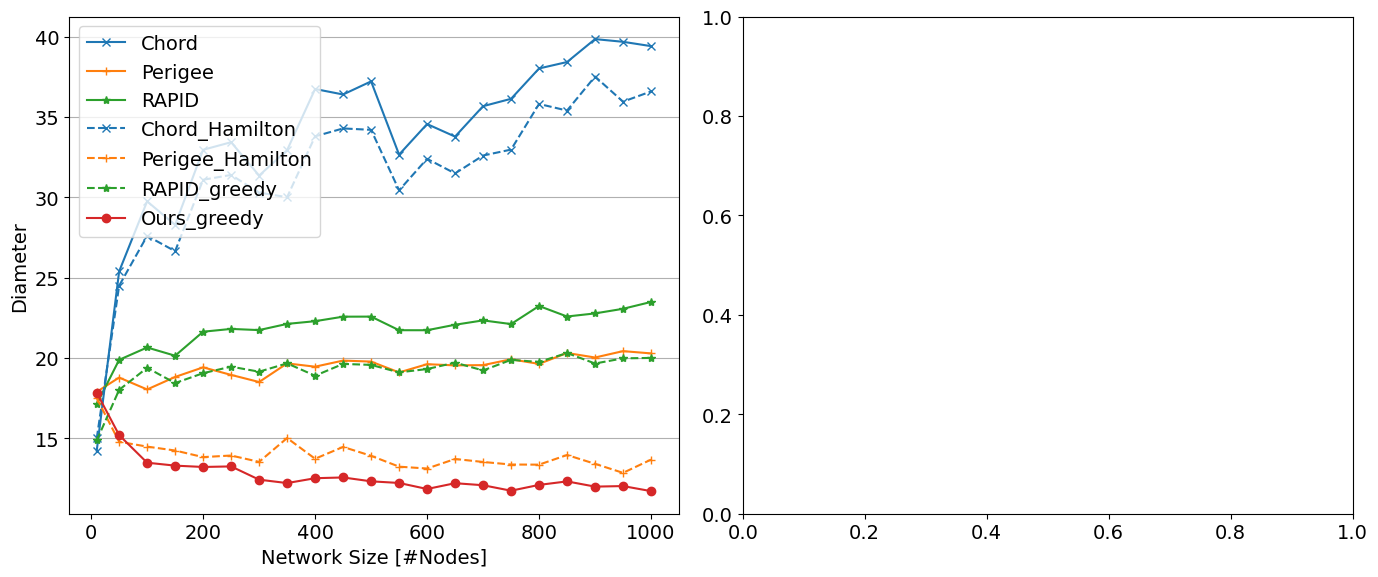

In [11]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
font = {
        'size'   : 14}
matplotlib.rc('font', **font)
N_list = [10]
seed = 1
for i in range(50, 1001, 50):
    N_list.append(i)
# labels = ['Chord', 'NN', 'RAPID', 'Perigee', 'Ours']
labels = ['Chord', 'Perigee', 'RAPID']
hatches = ["x", "/", ".", "\\",'']
tab10 = sns.color_palette("tab10", n_colors=5)
face_colors = tab10
x_tickslabel = N_list
width = 0.15
markers = ['x', '+', '*', 'o', 'P']
fig, axs = plt.subplots(ncols=2, figsize=(14, 6))
datas = [data_fabric]
for j in range(1):
	ax = axs[j]
	data = datas[j]
	print(j, data['Ours_greedy'])
	for i, label in enumerate(labels):
		print(label, data[label])
		ax.plot(N_list, data[label], label=label, color=face_colors[i], marker=markers[i])
	ax.plot(N_list, data['Chord_Hamilton'], linestyle='--',label='Chord_Hamilton', 
			color=face_colors[0], marker=markers[0])
	ax.plot(N_list, data['Perigee_Hamilton'], linestyle='--',
			label='Perigee_Hamilton', color=face_colors[1], marker=markers[1])
	ax.plot(N_list, data['Ours'], linestyle='--',label='RAPID_greedy',
			color=face_colors[2], marker=markers[2])
	ax.plot(N_list, data['Ours_greedy'], label='Ours_greedy',
			color=face_colors[3], marker=markers[3])
	ax.set_ylabel('Diameter')
	# ax.set_yticks([0, 250, 500, 750, 1000])
	# ax.set_yticklabels(['0', '2.5', '5', '7.5', '10'])
	# ax.set_yticklabels(['0', '250', '500', '750', '1000'], rotation=90)
	# ax.set_title('Diameter of different algorithms')
	# ax.set_xticks(x + 2.5*width)
	# ax.set_xticklabels(x_tickslabel)
	ax.set_xlabel('Network Size [#Nodes]')
	# ax.legend(loc='upper left', bbox_to_anchor=(1.0, .95), frameon=False)
	ax.legend()
	ax.grid(axis='y')
	# ax.set_ylim([0, 850])
	plt.tight_layout()
	# plt.show()
	# plt.savefig("diameter.png", bbox_inches='tight',)
	# plt.savefig("diameter.pdf", bbox_inches='tight')
